<div style="text-align:right;">Justine Charrel - Master 1 Internship</div>

In [63]:
import pandas as pd 
from datetime import datetime,date
import datetime
import numpy as np
import xarray as xr
from matplotlib import gridspec
import matplotlib.pyplot as plt

### Load Co-located ERA5 data (+ TOPAZ reanalysis)

In [65]:
era5_sfs60 = pd.read_csv('/lustre/storeB/users/justinec/master_internship/data/Met_city/mosasfs_level2v3_60_ERA5.csv')
for i in range(np.max(np.shape(era5_sfs60))):
    era5_sfs60['datetime'][i]= datetime.datetime.strptime(era5_sfs60.datetime[i], '%Y-%m-%d %H:%M:%S')  

### Load MOSAiC Data and filter to hourly data corresponding to the ERA5 data

In [6]:
# Run the first time
#mosasfs60met = xr.open_dataset("/lustre/storeB/users/maltem/nowwind/MOSAiC/mosseb.metcity.level2v3.10min.all.nc" 
#mosasfs60met_1h = mosasfs60met.resample(time="1H").interpolate("linear") 
#mosasfs60met_1h.to_netcdf("/lustre/storeB/users/justinec/master_internship/data/Met_city/mosasfs60met.level2v3.1h.all.nc")

In [66]:
mosasfs60met_1h = xr.open_dataset("/lustre/storeB/users/justinec/master_internship/data/Met_city/mosasfs60met.level2v3.1h.all.nc")

### Harmonize time-axis and set time range

In [67]:
tstart=pd.Timestamp('2019-10-1'); tend=pd.Timestamp('2020-9-30')

mosasfs60met_1h_sel = mosasfs60met_1h.sel(time=slice(tstart,tend))
df = era5_sfs60; df = df.set_index(['datetime']); df = df.loc[tstart:tend]; era5_sfs60_sel  = df.reset_index()

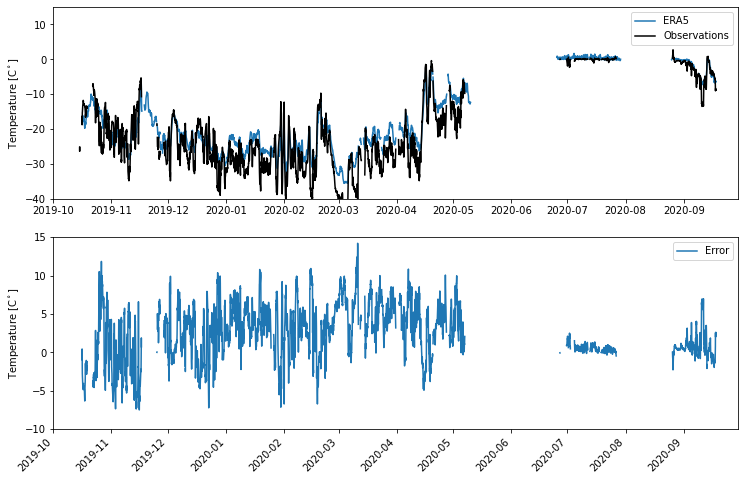

In [68]:
fig = plt.figure(figsize=(18,12))

gs = gridspec.GridSpec(3, 2, width_ratios=[3, 1],height_ratios=[1,1,1]) 


ax0 = plt.subplot(gs[0])

ax0.plot(era5_sfs60.datetime, era5_sfs60['skt']-273.15,'-',label='ERA5',color='C0')
ax0.plot(mosasfs60met_1h.time, mosasfs60met_1h.skin_temp_surface, '-',label='Observations',color='black')

ax0.legend()
ax0.set_xlim(tstart,tend)
ax0.set_ylim(-40,15)
ax0.set_ylabel('Temperature [C$^\circ$]')


    
ax1 = plt.subplot(gs[2])

ax1.plot(era5_sfs60.datetime, era5_sfs60['skt']-273.15-mosasfs60met_1h.skin_temp_surface,'-',label='Error',color='C0')
#*ax0.plot(mosasfs60met_1h.time, mosasfs60met_1h.skin_temp_surface, '-',label='Observations',color='black')

ax1.legend()
ax1.set_xlim(tstart,tend)
ax1.set_ylim(-10,15)
ax1.set_ylabel('Temperature [C$^\circ$]')

for label in ax1.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)